In [1]:
import datajoint as dj
import numpy as np
import tifffile as tf
import matplotlib.pyplot as plt
import retinotopic_mapping
import retinotopic_mapping.tools.FileTools as ft
import retinotopic_mapping.RetinotopicMapping as rm

In [2]:
# Set up your connection to the database server
dj.config['database.host'] = '139.91.171.210:3306'
dj.config['database.user'] = 'eflab'
dj.config['database.password'] = 'cajal123'

dj.conn()

Connecting eflab@139.91.171.210:3306


DataJoint connection (connected) eflab@139.91.171.210:3306

In [3]:
# list the names of database schemas available to you
#dj.list_schemas()

In [4]:
dj.config['display.limit'] = 40 

In [5]:
# we start by creating a schema object to connect to the chosen database schema
schema = dj.schema('pipeline_map')
# schema = dj.schema('tutorial', locals())
# If the schema already exists, dj.schema is initialized as usual and you may plot the schema diagram.
# But instead of seeing class names, you will see the raw table names as they appear in the database.

In [6]:
# let's plot its diagram -- gives error!!
#dj.Diagram(schema)

In [7]:
# to spawn classes into the local namespace for any tables missing their classes
schema.spawn_missing_classes()

In [8]:
opt_image_bar = OptImageBar()
opt_image_bar

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
9254,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9254,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9508,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9508,1,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9579,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875


In [9]:
opt_image_bar & 'selected = 1'

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
9254,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9254,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9508,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9579,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9580,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
10417,1,7,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
10566,1,9,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
10577,1,8,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
10578,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875


In [10]:
ret_map_scan = RetMapScan()
ret_map_scan

animal_id id number,ret_idx retinotopy map index for each animal,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement
9254,1,1,4,horizontal
9254,1,1,5,vertical
9329,1,1,5,vertical
9329,1,1,6,horizontal
9508,1,1,5,horizontal
9508,1,1,6,vertical
9579,1,1,6,horizontal
9579,1,1,7,vertical
9580,1,2,5,horizontal
9580,1,2,6,vertical


In [11]:
ret_map = RetMap()
ret_map

animal_id id number,ret_idx retinotopy map index for each animal
9254,1
9329,1
9508,1
9579,1
9580,1
10417,1
10566,1
10577,1
10578,1
10712,1


In [12]:
# query data for animal 9254 only
query = opt_image_bar & 'animal_id = 16154'
query

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
16154,1,2,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
16154,1,4,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
16154,2,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,1,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,1,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,2,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,2,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,5,1,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,5,1,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025


In [13]:
# split horizontal (azi) and vertical (alt)
azi_query = query & 'axis = "horizontal"'
azi_query

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
16154,1,2,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
16154,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,1,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,2,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,5,1,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,5,2,horizontal,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025


In [14]:
# split horizontal (azi) and vertical (alt)
alt_query = query & 'axis = "vertical"'
alt_query

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
16154,1,4,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
16154,2,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,1,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,4,2,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,5,1,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025
16154,5,2,vertical,=BLOB=,=BLOB=,=BLOB=,0,2.00000000025


In [15]:
azi_amp, azi_ang, azi_vessels = azi_query.fetch('amp', 'ang', 'vessels')
alt_amp, alt_ang, alt_vessels = alt_query.fetch('amp', 'ang', 'vessels')


In [16]:
azi_vessels.shape

(6,)

Text(0.5, 1.0, 'alt_vessels')

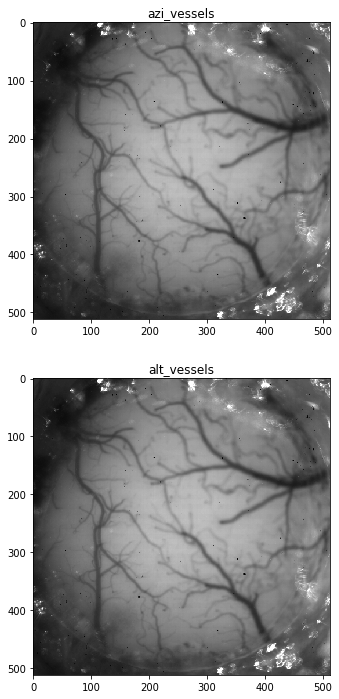

In [17]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(azi_vessels[0], cmap='gray', interpolation='nearest')
plt.title('azi_vessels')

plt.subplot(212)
plt.imshow(alt_vessels[0], cmap='gray', interpolation='nearest')
plt.title('alt_vessels')

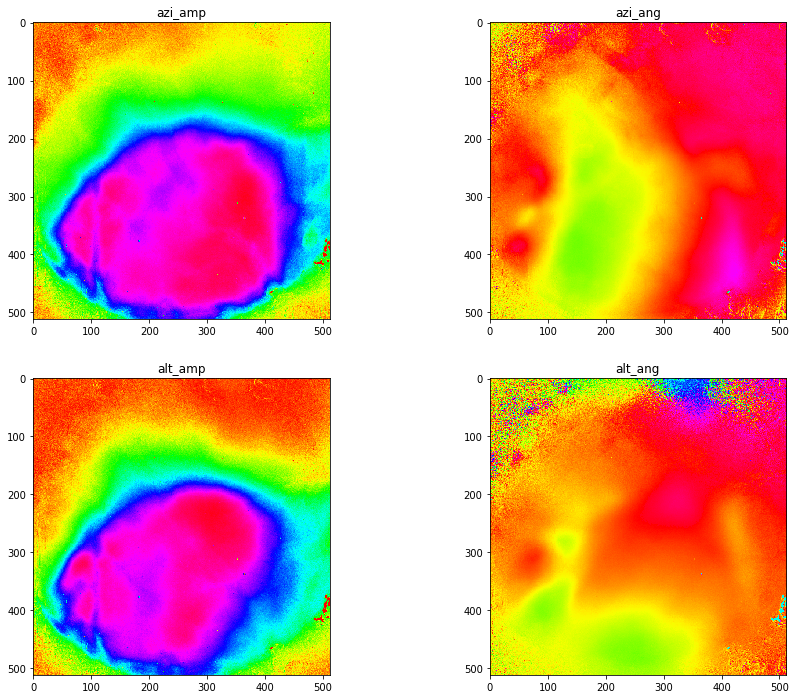

In [18]:
f = plt.figure(figsize=(15, 12))

plt.subplot(221)
plt.imshow(azi_amp[0], cmap='hsv', interpolation='nearest')
plt.title('azi_amp')

plt.subplot(222)
plt.imshow(azi_ang[0], cmap='hsv', interpolation='nearest')
plt.title('azi_ang')

plt.subplot(223)
plt.imshow(alt_amp[0], cmap='hsv', interpolation='nearest')
plt.title('alt_amp')

plt.subplot(224)
plt.imshow(alt_ang[0], cmap='hsv', interpolation='nearest')
plt.title('alt_ang')

plt.show()

In [19]:
params = {
          'phaseMapFilterSigma': 0.5,
          'signMapFilterSigma': 8.,
          'signMapThr': 0.4,
          'eccMapFilterSigma': 15.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [20]:
trial = rm.RetinotopicMappingTrial(altPosMap=alt_ang[0],
                                   aziPosMap=azi_ang[0],
                                   altPowerMap=alt_amp[0],
                                   aziPowerMap=azi_amp[0],
                                   vasculatureMap=azi_vessels[0],
                                   mouseID='16154',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

In [21]:
print (trial)

A retinotopic mapping trial: 160612_M16154


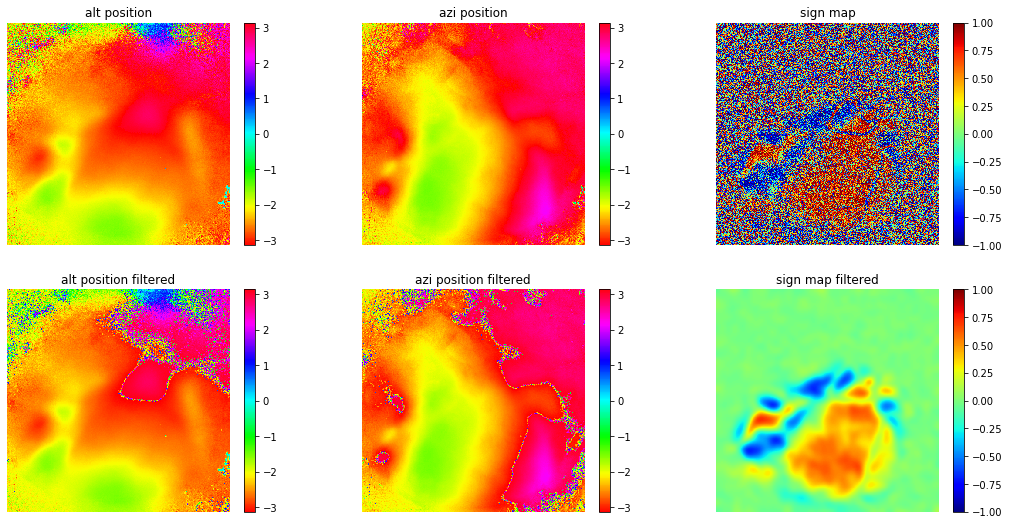

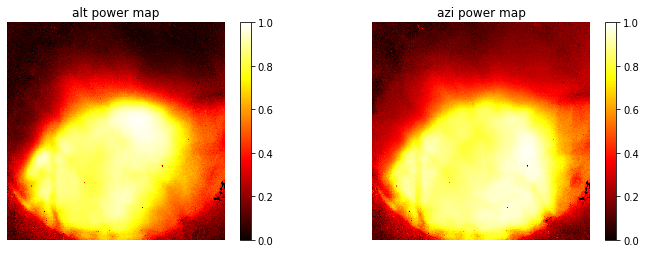

In [22]:
_ = trial._getSignMap(isPlot=True,isFixedRange=False)
plt.show()

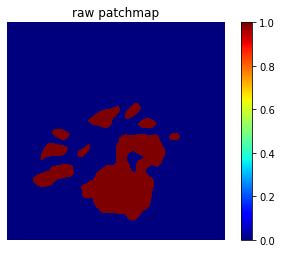

In [23]:
_ = trial._getRawPatchMap(isPlot=True)
plt.show()

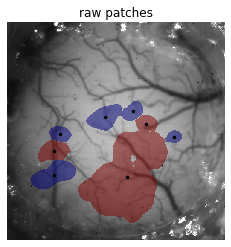

In [24]:
_ = trial._getRawPatches(isPlot=True)
plt.show()

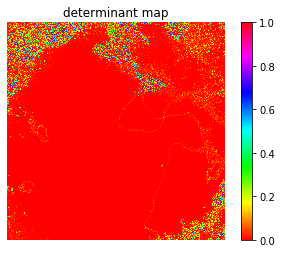

In [25]:
_ = trial._getDeterminantMap(isPlot=True)
plt.show()

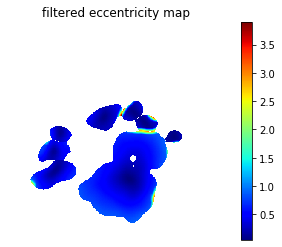

In [26]:
_ = trial._getEccentricityMap(isPlot=True)
plt.show()

patch01AU=15.25 AS=4.4028378 ratio=0.28871067234727205
patch02AU=3.5 AS=2.1139834 ratio=0.6039952550615583
patch03AU=4.25 AS=1.2277061 ratio=0.28887201757992015
patch04AU=3.0 AS=1.0996461 ratio=0.36654869715372723
patch05AU=3.25 AS=0.6316819 ratio=0.1943636674147386
patch06AU=13.75 AS=1.564871 ratio=0.1138087966225364
patch07AU=1.5 AS=0.49396297 ratio=0.3293086489041646
patch08AU=0.5 AS=0.08505577 ratio=0.1701115369796753


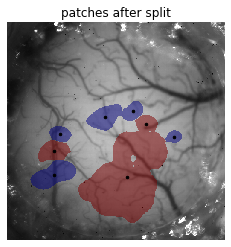

In [27]:
_ = trial._splitPatches(isPlot=True)
plt.show()

merge iteration: 1


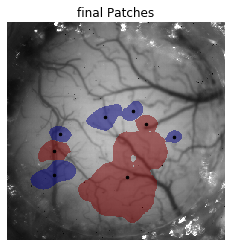

In [28]:
_ = trial._mergePatches(isPlot=True)
plt.show()

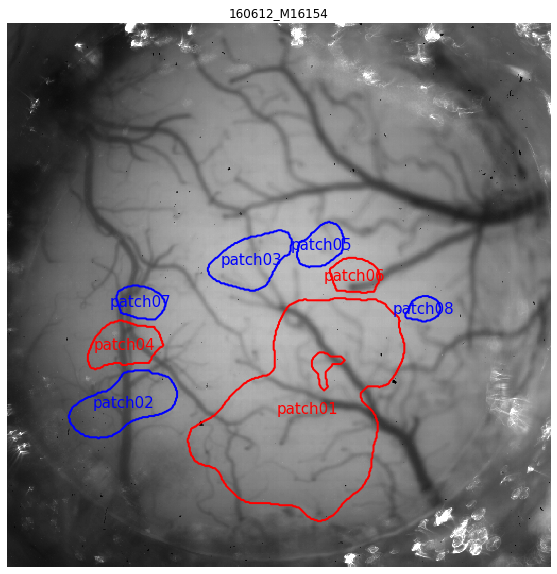

In [30]:
_ = trial.plotFinalPatchBorders2()
plt.show()